1. Load data from "Live_20210128.csv" file. Remove unwanted features if required. 

In [1]:
import pandas as pd

#Loading the Dataset
df = pd.read_csv('/Users/likith/Library/CloudStorage/OneDrive-Personal/Deakin University/Trimester 3/SIT720 - Machine Learning/Assesments/Week 3/Live_20210128.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
#Removing Columns which are empty
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis = 1, inplace = True)
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [3]:
#Removing status_id since the feature is a unique feature and does not impact the clustering
#Removing status published deature since it will create noise 
df.drop(['status_id', 'status_published'], axis = 1, inplace = True)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


2. Select the optimum k value using Silhouette Coefficient and plot the optimum k values.

In [4]:
#Performing Encoding for the Status_type feature
from sklearn.preprocessing import LabelEncoder

data = df
le = LabelEncoder()
data['status_type'] = le.fit_transform(data['status_type'])
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [5]:
#Performing min-max scaling for all the features
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

cols = data.columns
scaler = MinMaxScaler()

data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=[cols])
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [6]:
# Calculate silhouette coefficient for different values of k
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = range(2, 11)
sil_score = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    sil_score.append(silhouette_score(data, labels))

/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/an

In [7]:
#Finding the optimal K value
optimal_k_index = np.argmax(sil_score)
optimal_k = k_range[optimal_k_index]

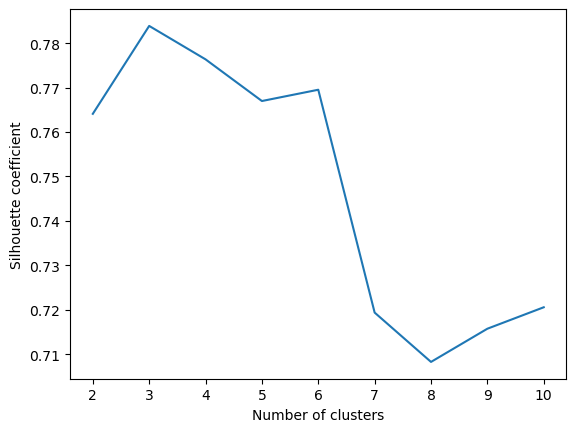

Optimal k value: 3


In [8]:
# Plot silhouette coefficient
plt.plot(k_range, sil_score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.show()

print("Optimal k value:", optimal_k)

3. Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the previous problem. Report performances using appropriate evaluation metrics. Compare the results. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Set the optimum number of clusters
optimal_cluster = 3

# Create KMeans and KMeans++ models
kmeans = KMeans(n_clusters=optimal_cluster, random_state=0)
kmeans_pp = KMeans(n_clusters=optimal_cluster, init='k-means++', random_state=0)

In [10]:
# Fit the models to the data
kmeans.fit(data)
kmeans_pp.fit(data)

# Predict the cluster labels
kmeans_pre = kmeans.predict(data)
kmeans_pp_pre = kmeans_pp.predict(data)

/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# Calculate the silhouette coefficients
sil_score_kmeans = silhouette_score(data, kmeans_pre)
sil_score_kmeans_pp = silhouette_score(data, kmeans_pp_pre)
kmeans_inertia = kmeans.inertia_
kmeans_pp_inertia = kmeans_pp.inertia_

# Print the silhouette coefficients
print("Silhouette coefficient for KMeans:", sil_score_kmeans)
print("Silhouette coefficient for KMeans++:", sil_score_kmeans_pp)
print("KMeans Inertia:", kmeans_inertia)
print("KMeans++ Inertia:", kmeans_pp_inertia)

Silhouette coefficient for KMeans: 0.7838777714765383
Silhouette coefficient for KMeans++: 0.7838777714765383
KMeans Inertia: 161.59633400033613
KMeans++ Inertia: 161.59633400033613


Answer: We can see that both Sil Score & Inertia Score is same for both KMeans & KMeans++ are similar. Hence we can say that for the provided dataset, we can use either KMeans & KMeans++ models.

4. Now repeat clustering using Kmeans for 50 times and report the average performance. Again compare the results that you have obtained in Q3 using Kmeans++ and explain the difference (if any).

In [18]:
# Initialize a list to store the silhouette coefficients
silhouette_scores_kmeans_n = []
inertia_values_kmeans_n = []

# Repeat clustering 50 times
for i in range(50):
    kmeans = KMeans(n_clusters=optimal_k, random_state=i)
    kmeans_labels = kmeans.fit_predict(data)
    silhouette_scores_kmeans_n.append(silhouette_score(data, kmeans_labels))
    inertia_values_kmeans_n.append(kmeans.inertia_)

/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/likith/an

In [19]:
# Calculate the average silhouette coefficient
avg_silhouette_kmeans = np.mean(silhouette_scores_kmeans_n)
avg_inertia_kmeans = np.mean(inertia_values_kmeans_n)

# Print the average silhouette coefficient
print("Average Silhouette Score (K-means):", avg_silhouette_kmeans)
print("Average Inertia (K-means):", avg_inertia_kmeans)

Average Silhouette Score (K-means): 0.7835941217929602
Average Inertia (K-means): 161.66159506659497


5. Apply DBSCAN on this dataset ("Live_20210128.csv") and find the optimum "eps" and "min_samples" value. Is the number of cluster same as the cluster found in Q2? Explain the similarity or differences that you have found between two solutions. 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


# Define a range of "eps" values to try
eps_values = np.arange(0.1, 1.0, 0.1)

# Define a range of "min_samples" values to try
min_samples_values = range(2, 11)

best_silhouette_score = -1
best_eps = None
best_min_samples = None
best_dbscan_labels = None

In [21]:
#Using DBSCAN
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(data)
        num_clusters = len(np.unique(dbscan_labels)) - 1
        # -1 because to remove noise

        # Calculate the silhouette score (excluding noise points)
        if num_clusters > 1:
        #2 cluster required for silhouette  
            silhouette = silhouette_score(data, dbscan_labels)

            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_eps = eps
                best_min_samples = min_samples
                best_dbscan_labels = dbscan_labels

In [22]:
#Printing optimal epsilon and minimum samples
print("Optimal eps:", best_eps)
print("Optimal min_samples:", best_min_samples)

Optimal eps: 0.30000000000000004
Optimal min_samples: 10


Answer: Since DBSCAN is a density based clustering, The algorithm identifies clusters based on density connectivity, and the number of clusters will depend on the data distribution and the chosen parameters. Therefore, the number of clusters obtained from DBSCAN might be different from the number of clusters found using K-means in Question 2.